<a href="https://colab.research.google.com/github/zierenberg/lecture_MC_disease/blob/main/excercise_MonteCarlo_SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from tqdm import tqdm


import os

try:
  os.mkdir("figures")
except OSError:
  pass

Deterministic solution

In [2]:
def SIR_derivative(u, t, rate_infection, rate_recovery):
    S, I, R = u
    N = S + I + R
    dSdt = -rate_infection * S * I / N
    dIdt =  rate_infection * S * I / N - rate_recovery * I
    dRdt =  rate_recovery * I
    return dSdt, dIdt, dRdt

def SIR_deterministic(rate_infection, rate_recovery, S0, I0, R0, times):
  u0 = S0, I0, R0
  
  # Integrate SIR equations over the time grid, t.
  sol = odeint(SIR_derivative, u0, times, args=(rate_infection, rate_recovery))
  S, I, R = sol.T
  return np.array(S), np.array(I), np.array(R)

# Kinetic Monte Carlo Simulation der SIR Dynamik
Implementiert das stochastische SIR Modell mit dem Gillespie Algorithmus und stellt die Ergebnisse grafisch dar.
(z.B. 𝜇=1/7, 𝜆=2/7, $N$=105, $R_0$=0, $I_0$=10, 1 Messpunkt pro Tag)

In [ ]:
#implement simulation here

Example

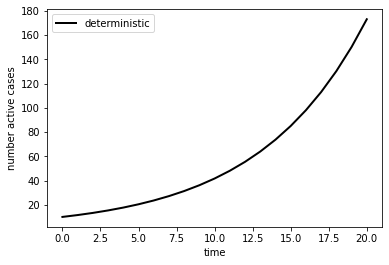

In [4]:
rate_recovery  = 1/7
rate_infection = 2/7
I0 = 10
N = int(1e5)
S0 = N-I0
R0 = 0
time_total = 21
times = np.arange(0,time_total,1)

# simulation

# deterministic solution
S_det, I_det, R_det = SIR_deterministic(rate_infection, rate_recovery, S0, I0, R0, times)
plt.plot(times, I_det, color='black', label='deterministic', linewidth=2)

plt.xlabel('time')
plt.ylabel('number active cases')
plt.legend()
plt.savefig('figures/kineticMC_example.png', dpi=200)